In [83]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [84]:
## loading the dataset.
df2=pd.read_csv("all_month.csv")
df2.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-22T02:21:07.540Z,35.504500,-118.392667,3.86,1.02,ml,15.0,101.0,0.1713,0.15,...,2023-01-22T02:24:37.288Z,"13km SE of Bodfish, CA",earthquake,0.33,0.80,0.144,12.0,automatic,ci,ci
1,2023-01-22T01:57:03.130Z,38.824833,-122.801666,2.55,1.89,md,32.0,33.0,NaN,0.02,...,2023-01-22T02:14:11.186Z,"7km NW of The Geysers, CA",earthquake,0.17,0.33,0.180,34.0,automatic,nc,nc
2,2023-01-22T01:56:26.625Z,64.627100,-150.159800,12.40,1.90,ml,NaN,NaN,NaN,0.50,...,2023-01-22T01:58:03.893Z,"47 km SSE of Manley Hot Springs, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
3,2023-01-22T01:53:47.160Z,19.259832,-155.420502,29.02,2.09,md,31.0,117.0,NaN,0.19,...,2023-01-22T01:57:01.360Z,"8 km NE of Pāhala, Hawaii",earthquake,0.68,0.94,1.790,14.0,automatic,hv,hv
4,2023-01-22T01:51:05.588Z,64.592500,-149.799600,18.00,1.50,ml,NaN,NaN,NaN,0.13,...,2023-01-22T01:52:59.631Z,"32 km W of Four Mile Road, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak


In [63]:
## loading the dataset.
df2=pd.read_csv("all_month.csv")
df2.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
9405,2022-12-23T02:44:45.937Z,63.282800,-150.606500,127.7,2.00,ml,NaN,NaN,NaN,0.3900,...,2023-01-07T03:06:05.369Z,"62 km ESE of Denali National Park, Alaska",earthquake,NaN,0.50,NaN,NaN,reviewed,ak,ak
9406,2022-12-23T02:42:28.843Z,38.180500,-117.813900,7.9,1.40,ml,16.0,133.87,0.122000,0.1421,...,2022-12-23T17:26:10.304Z,"34 km SE of Mina, Nevada",earthquake,NaN,1.60,0.30,4.0,reviewed,nn,nn
9407,2022-12-23T02:41:04.040Z,38.829666,-122.791664,1.5,1.13,md,24.0,45.00,0.008791,0.0300,...,2022-12-23T03:09:14.609Z,"6km W of Cobb, CA",earthquake,0.19,0.35,0.13,24.0,automatic,nc,nc
9408,2022-12-23T02:30:14.282Z,63.368900,-153.228800,7.1,1.60,ml,NaN,NaN,NaN,0.7400,...,2023-01-14T00:17:55.844Z,"70 km NE of Nikolai, Alaska",earthquake,NaN,0.30,NaN,NaN,reviewed,ak,ak
9409,2022-12-23T02:26:53.351Z,58.393000,-154.591000,6.3,2.00,ml,NaN,NaN,NaN,0.4600,...,2023-01-14T00:17:55.638Z,"92 km N of Karluk, Alaska",earthquake,NaN,0.30,NaN,NaN,reviewed,ak,ak


In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9410 entries, 0 to 9409
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9410 non-null   object 
 1   latitude         9410 non-null   float64
 2   longitude        9410 non-null   float64
 3   depth            9410 non-null   float64
 4   mag              9409 non-null   float64
 5   magType          9409 non-null   object 
 6   nst              6823 non-null   float64
 7   gap              6822 non-null   float64
 8   dmin             5053 non-null   float64
 9   rms              9410 non-null   float64
 10  net              9410 non-null   object 
 11  id               9410 non-null   object 
 12  updated          9410 non-null   object 
 13  place            9410 non-null   object 
 14  type             9410 non-null   object 
 15  horizontalError  6347 non-null   float64
 16  depthError       9410 non-null   float64
 17  magError      

In [65]:
df2.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,9410.000000,9410.000000,9410.000000,9409.000000,6823.000000,6822.000000,5053.000000,9410.000000,6347.000000,9410.000000,6745.000000,6810.000000
mean,40.694347,-117.863831,25.593011,1.645013,23.403635,119.461838,0.747333,0.294069,1.698991,2.083547,0.276723,15.534655
std,20.430642,66.380624,54.697555,1.230108,22.145048,62.376305,2.697378,0.276421,3.095408,15.786392,0.477658,23.290696
min,-65.407100,-179.973800,-3.330000,-1.120000,0.000000,14.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.000000
25%,33.431417,-154.926417,2.972500,0.890000,9.000000,70.000000,0.014850,0.090000,0.260000,0.420000,0.110000,5.000000
50%,38.830166,-122.852837,9.125811,1.430000,17.000000,106.000000,0.063090,0.176600,0.440000,0.710000,0.169000,9.000000
75%,58.247167,-116.722042,25.296000,2.100000,31.000000,157.000000,0.196200,0.470000,0.860000,1.400000,0.248000,18.000000
max,82.000600,179.944100,635.507000,7.600000,289.000000,352.540000,56.433000,2.000000,23.780000,1350.300000,5.190000,768.000000


In [66]:
df2.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   1
magType               1
nst                2587
gap                2588
dmin               4357
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError    3063
depthError            0
magError           2665
magNst             2600
status                0
locationSource        0
magSource             0
dtype: int64

In [85]:
df2.groupby(['time']).sum()

C:\Users\chizu\AppData\Local\Temp\ipykernel_14112\2252940793.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby(['time']).sum()


,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
time,,,,,,,,,,,,
2022-12-23T02:26:53.351Z,58.393000,-154.591000,6.30,2.00,0.0,0.00,0.000000,0.4600,0.00,0.30,0.000,0.0
2022-12-23T02:30:14.282Z,63.368900,-153.228800,7.10,1.60,0.0,0.00,0.000000,0.7400,0.00,0.30,0.000,0.0
2022-12-23T02:41:04.040Z,38.829666,-122.791664,1.50,1.13,24.0,45.00,0.008791,0.0300,0.19,0.35,0.130,24.0
2022-12-23T02:42:28.843Z,38.180500,-117.813900,7.90,1.40,16.0,133.87,0.122000,0.1421,0.00,1.60,0.300,4.0
2022-12-23T02:44:45.937Z,63.282800,-150.606500,127.70,2.00,0.0,0.00,0.000000,0.3900,0.00,0.50,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-22T01:51:05.588Z,64.592500,-149.799600,18.00,1.50,0.0,0.00,0.000000,0.1300,0.00,0.30,0.000,0.0
2023-01-22T01:53:47.160Z,19.259832,-155.420502,29.02,2.09,31.0,117.00,0.000000,0.1900,0.68,0.94,1.790,14.0
2023-01-22T01:56:26.625Z,64.627100,-150.159800,12.40,1.90,0.0,0.00,0.000000,0.5000,0.00,0.50,0.000,0.0


In [68]:
df2['time']= pd.to_datetime(df2['time'])

In [69]:
df2['time'] = df2['time'].dt.strftime("%Y-%m-%d")

In [86]:
first10 = df2.head(10)
first10

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-22T02:21:07.540Z,35.504500,-118.392667,3.86,1.02,ml,15.0,101.0,0.171300,0.15,...,2023-01-22T02:24:37.288Z,"13km SE of Bodfish, CA",earthquake,0.33,0.800,0.144,12.0,automatic,ci,ci
1,2023-01-22T01:57:03.130Z,38.824833,-122.801666,2.55,1.89,md,32.0,33.0,NaN,0.02,...,2023-01-22T02:14:11.186Z,"7km NW of The Geysers, CA",earthquake,0.17,0.330,0.180,34.0,automatic,nc,nc
2,2023-01-22T01:56:26.625Z,64.627100,-150.159800,12.40,1.90,ml,NaN,NaN,NaN,0.50,...,2023-01-22T01:58:03.893Z,"47 km SSE of Manley Hot Springs, Alaska",earthquake,NaN,0.500,NaN,NaN,automatic,ak,ak
3,2023-01-22T01:53:47.160Z,19.259832,-155.420502,29.02,2.09,md,31.0,117.0,NaN,0.19,...,2023-01-22T01:57:01.360Z,"8 km NE of Pāhala, Hawaii",earthquake,0.68,0.940,1.790,14.0,automatic,hv,hv
4,2023-01-22T01:51:05.588Z,64.592500,-149.799600,18.00,1.50,ml,NaN,NaN,NaN,0.13,...,2023-01-22T01:52:59.631Z,"32 km W of Four Mile Road, Alaska",earthquake,NaN,0.300,NaN,NaN,automatic,ak,ak
5,2023-01-22T01:39:22.975Z,61.718800,-147.698300,31.60,1.60,ml,NaN,NaN,NaN,1.09,...,2023-01-22T01:41:06.653Z,"10 km SSW of Glacier View, Alaska",earthquake,NaN,0.200,NaN,NaN,automatic,ak,ak
6,2023-01-22T01:34:08.410Z,38.780335,-122.763664,1.36,1.56,md,28.0,71.0,0.009736,0.04,...,2023-01-22T02:07:12.146Z,"1km WNW of The Geysers, CA",earthquake,0.23,0.340,0.150,28.0,automatic,nc,nc
7,2023-01-22T01:30:07.418Z,19.020400,-64.866100,35.00,3.10,ml,15.0,279.0,0.670000,0.43,...,2023-01-22T01:35:30.040Z,"75 km N of Charlotte Amalie, U.S. Virgin Islands",earthquake,7.68,2.026,0.067,29.0,reviewed,us,us
8,2023-01-22T01:21:10.430Z,34.645000,-119.050833,0.33,1.44,ml,23.0,53.0,0.098230,0.25,...,2023-01-22T01:24:43.155Z,"22km SSW of Frazier Park, CA",earthquake,0.33,0.650,0.174,28.0,automatic,ci,ci
9,2023-01-22T01:08:32.306Z,58.134400,-155.487900,21.30,0.80,ml,NaN,NaN,NaN,0.87,...,2023-01-22T01:11:11.187Z,Alaska Peninsula,earthquake,NaN,1.100,NaN,NaN,automatic,ak,ak


Text(0.5, 1.0, 'Earthquake Magnitude of First 10 Results')

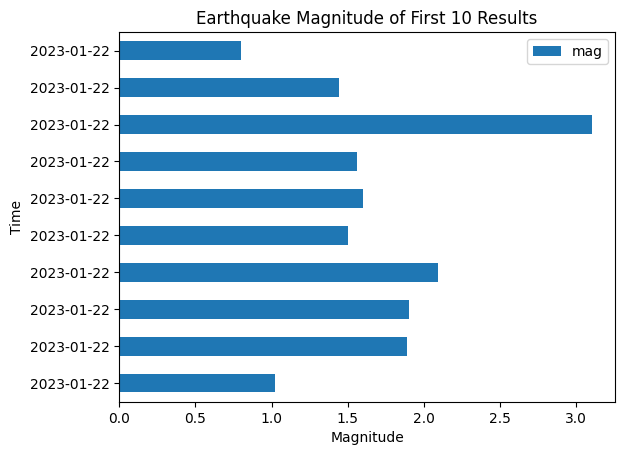

In [95]:
#Bar Chart showing the magnitude of the first 10 results of the earthquake database
fig, ax = plt.subplots()
first10.plot(kind = 'barh', x ='time', y = 'mag', ax=ax)
plt.ylabel("Time")
plt.xlabel("Magnitude")
plt.title('Earthquake Magnitude of First 10 Results')

Text(0.5, 1.0, 'Earthquake Magnitude of First 10 Results')

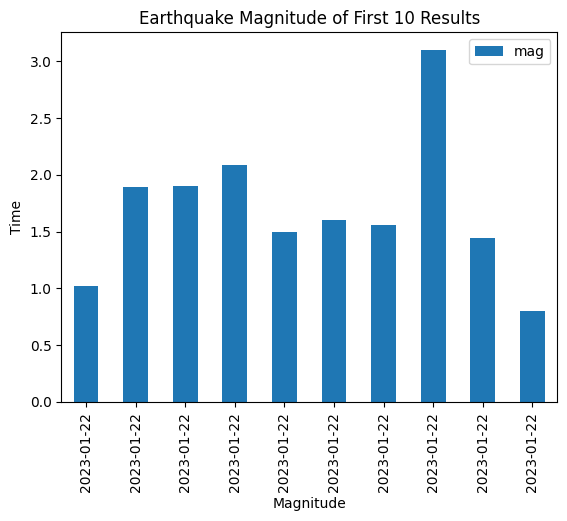

In [96]:
#Bar Chart showing the magnitude of the first 10 results of the earthquake database
fig, ax = plt.subplots()
first10.plot(kind = 'bar', x ='time', y = 'mag', ax=ax)
plt.ylabel("Time")
plt.xlabel("Magnitude")
plt.title('Earthquake Magnitude of First 10 Results')

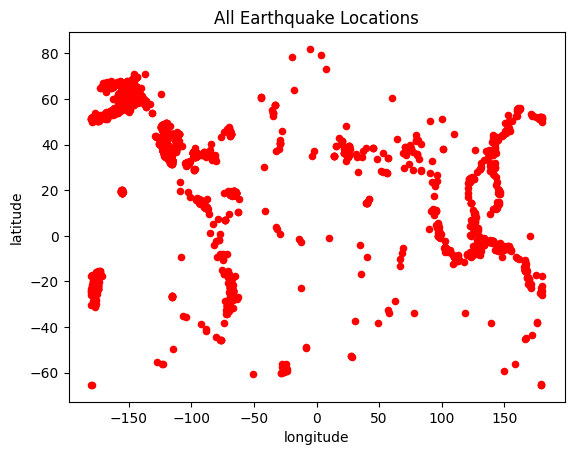

In [98]:
#Full Data Scatter Graph 
fig, ax = plt.subplots()
df2.plot(kind = 'scatter', x ='longitude', y = 'latitude', color = 'red', ax=ax)
plt.title('All Earthquake Locations')
plt.show()

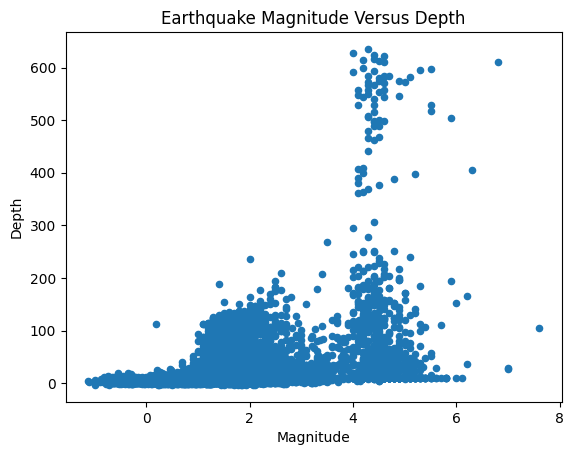

In [99]:
#Box Plot
fig, ax = plt.subplots()
df2.plot(kind = 'scatter', x ='mag', y = 'depth', ax=ax)
plt.ylabel("Depth")
plt.xlabel("Magnitude")
plt.title('Earthquake Magnitude Versus Depth')
plt.show()

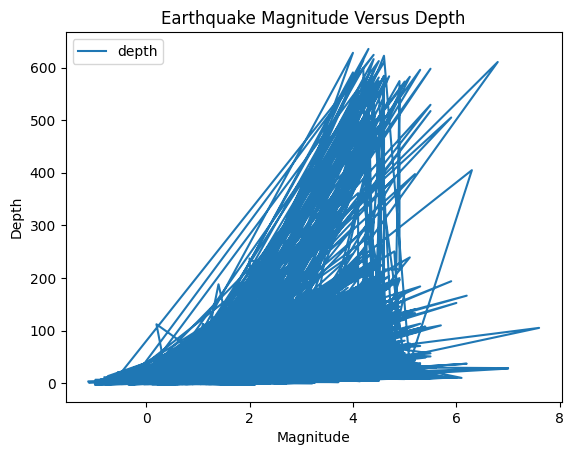

In [101]:
#Box Plot
fig, ax = plt.subplots()
df2.plot(kind = 'line', x ='mag', y = 'depth', ax=ax)
plt.ylabel("Depth")
plt.xlabel("Magnitude")
plt.title('Earthquake Magnitude Versus Depth')
plt.show()

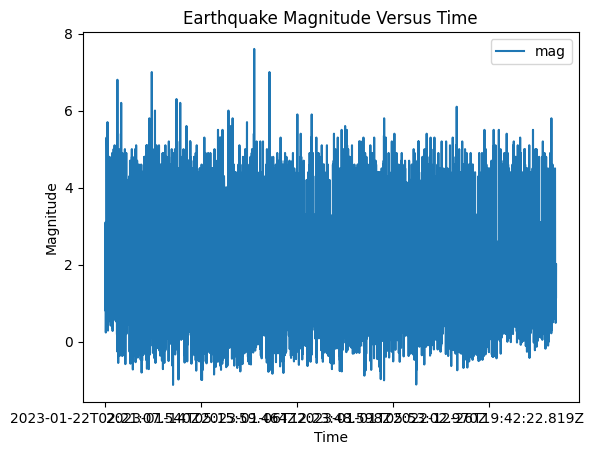

In [102]:
#Box Plot
fig, ax = plt.subplots()
df2.plot(kind = 'line', x = 'time', y = 'mag', ax=ax)
plt.ylabel("Magnitude")
plt.xlabel("Time")
plt.title('Earthquake Magnitude Versus Time')
plt.show()





In [91]:
first10['time']= pd.to_datetime(df2['time'])


C:\Users\chizu\AppData\Local\Temp\ipykernel_14112\1852110795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first10['time']= pd.to_datetime(df2['time'])


In [92]:
first10['time'] = first10['time'].dt.strftime("%Y-%m-%d")

C:\Users\chizu\AppData\Local\Temp\ipykernel_14112\212320186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first10['time'] = first10['time'].dt.strftime("%Y-%m-%d")


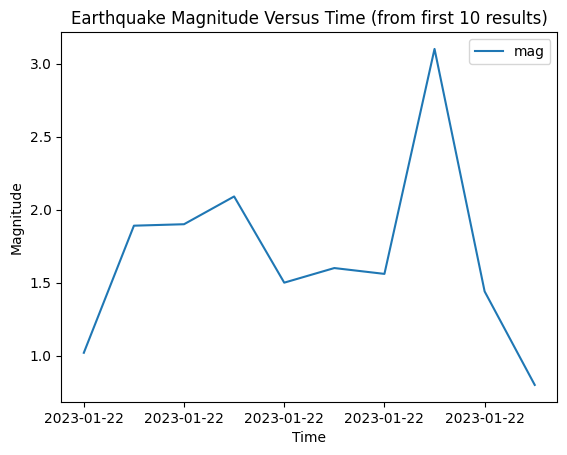

In [104]:
fig, ax = plt.subplots()
first10.plot(kind = 'line', x = 'time', y = 'mag', ax=ax)
plt.ylabel("Magnitude")
plt.xlabel("Time")
plt.title('Earthquake Magnitude Versus Time (from first 10 results)')
plt.show()


In [94]:

magnitude = pd.DataFrame(df2['depth'].value_counts())
mgnt = magnitude.head(10)
print(mgnt)


      depth
10.0    320
0.0     143
35.0     67
5.0      26
1.7      25
1.1      24
1.8      23
2.1      22
1.3      21
20.0     20
